# DeepSeek形态学识别

- @作者：AFAN
- @时间：2025-04-09
- @B站：[AFAN的金融科技](https://space.bilibili.com/1020711810)
- @公众号：[AFAN Fintech（点击通过文章关注）](https://mp.weixin.qq.com/s/f1Om7j9jndkqhlyfyqrgOw)
- @微信：afan-life
- @github：https://github.com/AFAN-LIFE/AFAN-LIFE
- @知识星球（付费分享）：[AFAN的金融科技](https://wx.zsxq.com/group/88885818554422)
- *注：本分享来自于AFAN的公开分享，转载请注明出处

In [10]:
import talib
import matplotlib
import numpy as np
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

In [11]:
np.__version__, pd.__version__, mpf.__version__, matplotlib.__version__, talib.__version__

('1.24.3', '2.0.3', '0.12.10b0', '3.7.2', '0.6.3')

In [14]:
# 获取浦发银行60000.SH的历史分钟数据
df = pd.read_csv('测试数据.csv', index_col=0).sort_values('trade_time')

## 蜡烛图展示

In [15]:
adj_df = df.set_index('trade_time')
adj_df.index = pd.DatetimeIndex(adj_df.index)
adj_df = adj_df.rename(columns={'vol': 'volume'})

In [16]:
adj_df

,ts_code,close,open,high,low,volume,amount
trade_time,,,,,,,
2025-03-21 09:30:00,600000.SH,10.63,10.63,10.63,10.63,147100.0,1563673.0
2025-03-21 09:31:00,600000.SH,10.65,10.64,10.68,10.62,496100.0,5282928.0
2025-03-21 09:32:00,600000.SH,10.63,10.66,10.66,10.63,294000.0,3131448.0
2025-03-21 09:33:00,600000.SH,10.64,10.64,10.66,10.63,146000.0,1554048.0
2025-03-21 09:34:00,600000.SH,10.64,10.65,10.65,10.62,133700.0,1422218.0
...,...,...,...,...,...,...,...
2025-03-21 14:56:00,600000.SH,10.44,10.44,10.45,10.44,193100.0,2017274.0
2025-03-21 14:57:00,600000.SH,10.45,10.45,10.45,10.44,487500.0,5091717.0
2025-03-21 14:58:00,600000.SH,10.44,10.44,10.44,10.44,9800.0,102382.0


In [19]:
# 设置mplfinance的蜡烛颜色，up为阳线颜色，down为阴线颜色
my_color = mpf.make_marketcolors(up='r',
                                 down='g',
                                 edge='inherit',
                                 wick='inherit',
                                 volume='inherit')
# 设置图表的背景色
my_style = mpf.make_mpf_style(marketcolors=my_color,
                              figcolor='(0.82, 0.83, 0.85)',
                              gridcolor='(0.82, 0.83, 0.85)')

(<Figure size 800x575 with 4 Axes>,
 [<Axes: ylabel='Price'>,
  <Axes: >,
  <Axes: ylabel='Volume  $10^{6}$'>,
  <Axes: >])

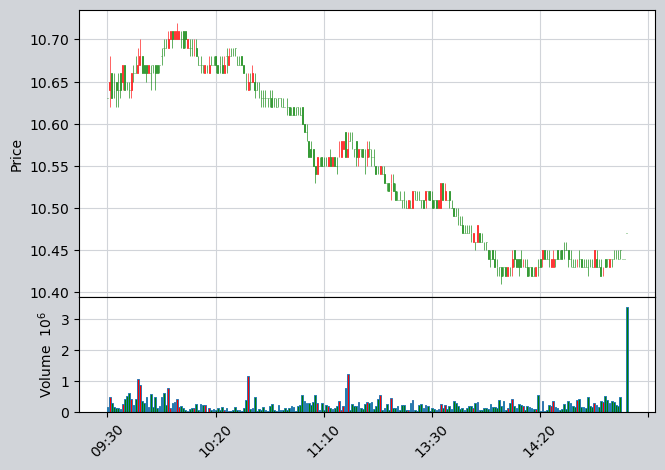

In [20]:
mpf.plot(adj_df, style=my_style, type='candle', volume=True, returnfig=True)

## TA-Lib指标

C:\Users\AFAN\AppData\Local\Temp\ipykernel_11632\2815470811.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


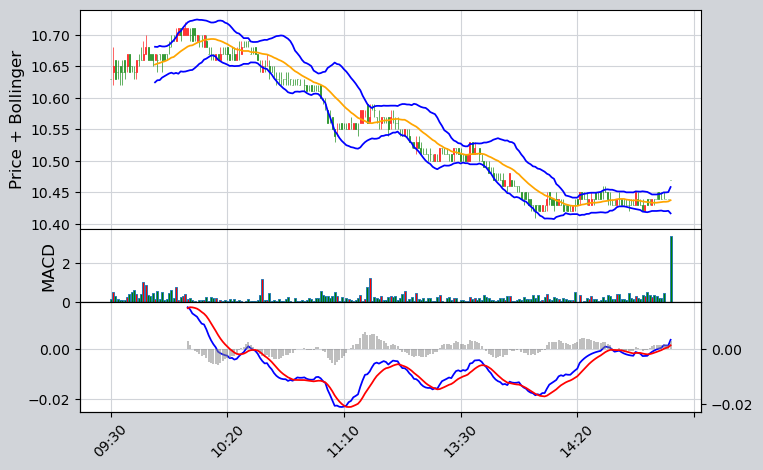

In [45]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import talib

## 蜡烛图展示
adj_df = df.set_index('trade_time')
adj_df.index = pd.DatetimeIndex(adj_df.index)
adj_df = adj_df.rename(columns={'vol': 'volume'})

# 准备相关数据
close_prices = adj_df['close'].values
high_prices = adj_df['high'].values
low_prices = adj_df['low'].values

# 计算MACD
adj_df['MACD'], adj_df['MACD_signal'], adj_df['MACD_hist'] = talib.MACD(close_prices, 
                                                                       fastperiod=12, 
                                                                       slowperiod=26, 
                                                                       signalperiod=9)

# 计算布林带
adj_df['upper_band'], adj_df['middle_band'], adj_df['lower_band'] = talib.BBANDS(
    close_prices, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

# 设置mplfinance的蜡烛颜色
my_color = mpf.make_marketcolors(up='r',
                                down='g',
                                edge='inherit',
                                wick='inherit',
                                volume='inherit')
# 设置图表的背景色
my_style = mpf.make_mpf_style(marketcolors=my_color,
                             figcolor='(0.82, 0.83, 0.85)',
                             gridcolor='(0.82, 0.83, 0.85)')

# 创建添加技术指标的图表
add_plot = [
    # 布林带 - 每条线单独指定颜色
    mpf.make_addplot(adj_df['upper_band'], color='blue', panel=0),
    mpf.make_addplot(adj_df['middle_band'], color='orange', panel=0),
    mpf.make_addplot(adj_df['lower_band'], color='blue', panel=0),
    
    # MACD - 两条线分开绘制
    mpf.make_addplot(adj_df['MACD'], color='blue', panel=2),
    mpf.make_addplot(adj_df['MACD_signal'], color='red', panel=2),
    mpf.make_addplot(adj_df['MACD_hist'], type='bar', color='gray', panel=2, alpha=0.5)
]

# 绘制图表（3个面板：K线+布林带、成交量、MACD）
fig, axes = mpf.plot(adj_df, 
                    style=my_style, 
                    type='candle', 
                    volume=True, 
                    addplot=add_plot,
                    figratio=(12, 8),
                    panel_ratios=(6, 2, 3),  # 调整面板高度比例
                    returnfig=True)

# 添加所有面板标签
axes[0].set_ylabel('Price + Bollinger', fontsize=12)  # 主图（K线+布林带）
axes[1].set_ylabel('Volume', fontsize=12)            # 成交量面板（之前遗漏的标签）
axes[2].set_ylabel('MACD', fontsize=12)              # MACD面板

# 调整布局
plt.tight_layout()
plt.savefig('bollinger_macd.png')  # 保存为PNG文件
plt.show()

## DeepSeek预测

In [29]:
SK_CODE = '你的硅基流动token'

In [30]:
import base64

# 将本地图片转换为 Base64 编码
def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

In [31]:
# 将图片转换为 Base64
image_base64 = image_to_base64('bollinger_macd.png')

In [36]:
import requests

url = "https://api.siliconflow.cn/v1/chat/completions"

payload = {
    "model": "deepseek-ai/deepseek-vl2",
    "stream": False,
    "max_tokens": 512,
    "temperature": 0.7,
    "top_p": 0.7,
    "top_k": 50,
    "frequency_penalty": 0.5,
    "n": 1,
    "stop": [],
    "messages": [
        {
            "role": "user",
            "content": [
                {
                    "image_url": {
                        "detail": "auto",
                        "url": f"data:image/png;base64,{image_base64}"  # 使用 Base64 编码的图片数
                    },
                    "type": "image_url"
                },
                {
                    "text": """你是一个研究股票投资形态学理论的专家，请你根据这个股票一天的分钟K线，
                    以及布林带和MACD来分析这只股票明天上涨的概率，并一定要给出一个-1到1之间的值，
                    -1表示大概率会下跌，1表示大概率上涨，0表示涨跌不确定，最好输出一个概率小数""",
                    "type": "text"
                }
            ]
        }
  ],
}
headers = {
    "Authorization": f"Bearer {SK_CODE}",
    "Content-Type": "application/json"
}

In [37]:
# 忽略 SSL 验证
response = requests.post(url, json=payload, headers=headers, verify=False)
response.text

D:\software\anaconda3\Lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


'{"id":"01961ad0340b821b4dd52b1ba9131d08","object":"chat.completion","created":1744206575,"model":"deepseek-ai/deepseek-vl2","choices":[{"index":0,"message":{"role":"assistant","content":"根据提供的股票分钟K线图，可以看到以下几点：\\n\\n1. **价格趋势**：图中显示股价在当天呈现一个明显的下降趋势，从大约10.70元下降至10.40元左右。这种趋势通常意味着市场对这只股票的需求减少，可能导致股价继续下跌。\\n\\n2. **布林带**：布林带由三条线组成，分别是上轨、中轨和下轨。图中的布林带显示价格在下降过程中触碰了下轨，并且没有迹象表明价格会迅速反弹。这通常意味着市场情绪偏向看跌。\\n\\n3. **MACD指标**：MACD指标显示红色柱状图和蓝色柱状图之间的交叉。虽然图中没有明显的金叉或死叉出现，但红色柱状图持续存在，这表明空头力量仍然较强。\\n\\n综合以上分析，这只股票明天的上涨概率较低。根据上述观察，我给出的概率为0.20（即20%）。"},"finish_reason":"stop"}],"usage":{"prompt_tokens":1491,"completion_tokens":191,"total_tokens":1682},"system_fingerprint":""}'